# Road Safety Data

This report aims to provide the London City Police with some evidence to support the sus-pects of semi-organised where young people drive around London / London Greater Areato demonstrate their luxurious cars. According to some reports from locals, these eventsoccur during the nights over the weekend nearby Westminster. The observations madeby the local authorities suggest that the event established itself spontaneously a coupleof years ago and that it has become a semi-organised event that lasts for a period of 2 to4 weeks. The data and visualisations from this report suggest that this is a recurrent eventhappening almost every weekend from Friday to Sunday, mainly during January, Novem-ber, and December. Data shows that Tower Hamlets and Westminster, are the areas withthe most severe accidents and the highest number of casualties in London and LondonGreater Area, which agrees with police reports from residents of those areas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import sys
print('Version:', sys.version)
print('Python executable:', sys.executable)

Version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Python executable: C:\Users\franc\anaconda3\python.exe


In [2]:
file_path = r"C:\Users\franc\Documents\Electrolux\Data Science Task Data/"

### Read in data

#### 2015

In [3]:
file_name = "2015\Accidents_2015.csv"
df_accidents_2015 = pd.read_csv(file_path + file_name)

file_name = "2015\Vehicles_2015.csv"
df_vehicles_2015 = pd.read_csv(file_path + file_name)

file_name = "2015\Casualties_2015.csv"
df_casualties_2015 = pd.read_csv(file_path + file_name)

C:\Users\franc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 2016-2020

In [4]:
file_name = "5yr\dft-road-casualty-statistics-accident-last-5-years.csv"
df_accidents_5yr = pd.read_csv(file_path + file_name)

file_name = "5yr\dft-road-casualty-statistics-vehicle-last-5-years.csv"
df_vehicles_5yr = pd.read_csv(file_path + file_name)

file_name = "5yr\dft-road-casualty-statistics-casualty-last-5-years.csv"
df_casualties_5yr = pd.read_csv(file_path + file_name)

C:\Users\franc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\franc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Codes from guide

In [5]:
file_name = "Road-Accident-Safety-Data-Guide.xls"

codes_day_of_week = pd.read_excel(file_path + file_name, sheet_name = "Day of Week")

codes_acc_severity = pd.read_excel(file_path + file_name, sheet_name = "Accident Severity")

codes_district = pd.read_excel(file_path + file_name, sheet_name = "Local Authority (District)")

codes_highway = pd.read_excel(file_path + file_name, sheet_name = "Local Authority (Highway)")

codes_urban = pd.read_excel(file_path + file_name, sheet_name = "Urban Rural")

codes_vehicle = pd.read_excel(file_path + file_name, sheet_name = "Vehicle Type")

codes_age_band = pd.read_excel(file_path + file_name, sheet_name = "Age Band")

codes_sex = pd.read_excel(file_path + file_name, sheet_name = "Sex of Driver")

In [6]:
codes_day_of_week = codes_day_of_week.set_index('code')['label'].to_dict() 
codes_acc_severity = codes_acc_severity.set_index('code')['label'].to_dict() 
codes_district = codes_district.set_index('code')['label'].to_dict() 
#codes_highway = codes_highway.set_index('')['label'].to_dict() 
codes_urban = codes_urban.set_index('code')['label'].to_dict() 
codes_vehicle = codes_vehicle.set_index('code')['label'].to_dict() 
codes_age_band = codes_age_band.set_index('code')['label'].to_dict() 

codes_sex = codes_sex.set_index('code')['label'].to_dict() 

In [7]:
print(df_accidents_2015.shape)
print(df_casualties_2015.shape)
print(df_vehicles_2015.shape)

print(df_accidents_5yr.shape)
print(df_casualties_5yr.shape)
print(df_vehicles_5yr.shape)

print(34+23+16)

(140056, 32)
(186189, 16)
(257845, 23)
(597973, 36)
(781716, 18)
(1101591, 27)
73


In [8]:
df_accidents_2015.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [9]:
df_casualties_2015.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201597UA71710,2,1,1,2,75,10,3,0,0,0,0,0,9,3,-1
1,201597UA71810,2,1,2,2,63,9,2,0,0,0,4,0,11,3,-1
2,201597UA71810,2,2,2,2,75,10,2,0,0,0,4,0,11,1,-1
3,201597UA71810,2,3,2,1,78,11,2,0,0,0,4,0,11,1,-1
4,201597UA71810,2,4,2,1,67,10,2,0,0,0,4,0,11,1,-1


In [10]:
df_vehicles_2015.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,6,1,45,7,1794,1,11,-1,1,-1
1,201506E098766,1,9,0,9,0,8,0,0,0,...,6,2,25,5,1582,2,1,-1,-1,-1
2,201506E098766,2,9,0,18,0,8,0,0,0,...,6,1,51,8,-1,-1,-1,-1,1,-1
3,201506E098777,1,20,0,4,0,0,0,0,0,...,1,1,50,8,4462,2,1,-1,1,-1
4,201506E098780,1,9,0,15,0,1,0,0,0,...,6,1,27,6,1598,2,-1,-1,1,-1


In [11]:
df_accidents_5yr['date'].head()

0    01/11/2016
1    01/11/2016
2    01/11/2016
3    01/11/2016
4    01/11/2016
Name: date, dtype: object

### Change some column names match and  all to lower case

In [12]:
df_accidents_2015.columns= df_accidents_2015.columns.str.strip().str.lower()
df_casualties_2015.columns= df_casualties_2015.columns.str.strip().str.lower()
df_vehicles_2015.columns= df_vehicles_2015.columns.str.strip().str.lower()

In [13]:
df_accidents_2015.rename(columns={'local_authority_(district)':'local_authority_district',
                         'local_authority_(highway)':'local_authority_highway',
                         '1st_road_class':'first_road_class',
                         '1st_road_number': 'first_road_number',
                         '2nd_road_class':'second_road_class',
                         '2nd_road_number':'second_road_number'},
                         inplace = True)

In [14]:
df_vehicles_2015.rename(columns={'engine_capacity_(cc)':'engine_capacity_cc'},
                         inplace = True)

In [15]:
print('Accidents 2015 column names:',df_accidents_2015.columns)
print('Casualties 2015 column names:',df_casualties_2015.columns)
print('Vehicles 2015 column names:',df_vehicles_2015.columns)

print('Accidents 5y column names:',df_accidents_5yr.columns)
print('Casualties 5yr column names:',df_casualties_5yr.columns)
print('Vehicles 5yr column names:',df_vehicles_5yr.columns)

Accidents 2015 column names: Index(['accident_index', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location'],
      dtype='object')
Casualties 2015 column names: Index(['accident_index', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of

### Create a copy of accident severity to invert the scale and keep the original for recoding

In [16]:
df_accidents_2015['accident_severity_num'] = df_accidents_2015['accident_severity']
df_accidents_5yr['accident_severity_num'] = df_accidents_5yr['accident_severity']

In [17]:
# Invert Accident Severity
df_accidents_2015['accident_severity_inv'] = 4-df_accidents_2015['accident_severity_num']
df_accidents_5yr['accident_severity_inv'] = 4-df_accidents_5yr['accident_severity_num']

In [18]:
df_accidents_2015['date2'] = df_accidents_2015['date']
df_accidents_5yr['date2'] = df_accidents_5yr['date']

### Create a copy pf date, to keep the original date and transform it to datetime

In [19]:
# Convert to data type
df_accidents_2015['date_original'] = df_accidents_2015['date']
df_accidents_5yr['date_original'] = df_accidents_5yr['date']

In [20]:
df_accidents_2015['date']

0         12/01/2015
1         12/01/2015
2         12/01/2015
3         13/01/2015
4         09/01/2015
             ...    
140051    11/12/2015
140052    02/12/2015
140053    23/12/2015
140054    26/12/2015
140055    31/12/2015
Name: date, Length: 140056, dtype: object

In [21]:
df_accidents_5yr['date']

0         01/11/2016
1         01/11/2016
2         01/11/2016
3         01/11/2016
4         01/11/2016
             ...    
597968    12/08/2020
597969    13/11/2020
597970    15/04/2020
597971    15/12/2020
597972    25/08/2020
Name: date, Length: 597973, dtype: object

In [22]:
# Convert to data type
df_accidents_2015['date'] = pd.to_datetime(df_accidents_2015['date'])#, errors='coerce')#, format='%m/%d/%Y')
df_accidents_5yr['date'] = pd.to_datetime(df_accidents_5yr['date'])#, errors='coerce')#, format='%m/%d/%Y')

In [23]:
df_accidents_2015['date'].isna().sum()

0

In [24]:
df_accidents_5yr['date'].isna().sum()

0

In [25]:
df_accidents_5yr['date']

0        2016-01-11
1        2016-01-11
2        2016-01-11
3        2016-01-11
4        2016-01-11
            ...    
597968   2020-12-08
597969   2020-11-13
597970   2020-04-15
597971   2020-12-15
597972   2020-08-25
Name: date, Length: 597973, dtype: datetime64[ns]

### Remap some columns to their codes

In [26]:
df_accidents_2015['day_of_week'] = df_accidents_2015['day_of_week'].map(codes_day_of_week)
df_accidents_2015['day_of_week']

0            Monday
1            Monday
2            Monday
3           Tuesday
4            Friday
            ...    
140051       Friday
140052    Wednesday
140053    Wednesday
140054     Saturday
140055     Thursday
Name: day_of_week, Length: 140056, dtype: object

In [27]:
df_accidents_5yr['day_of_week'] = df_accidents_5yr['day_of_week'].map(codes_day_of_week)

In [28]:
df_accidents_2015['accident_severity'] = df_accidents_2015['accident_severity'].map(codes_acc_severity)

In [29]:
df_accidents_5yr['accident_severity'] = df_accidents_5yr['accident_severity'].map(codes_acc_severity)

In [30]:
df_accidents_2015['accident_severity']

0          Slight
1          Slight
2          Slight
3          Slight
4         Serious
           ...   
140051     Slight
140052     Slight
140053    Serious
140054     Slight
140055     Slight
Name: accident_severity, Length: 140056, dtype: object

### Check data info and missing values

In [31]:
df_accidents_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               140056 non-null  object        
 1   location_easting_osgr                        140029 non-null  float64       
 2   location_northing_osgr                       140029 non-null  float64       
 3   longitude                                    140029 non-null  float64       
 4   latitude                                     140029 non-null  float64       
 5   police_force                                 140056 non-null  int64         
 6   accident_severity                            140056 non-null  object        
 7   number_of_vehicles                           140056 non-null  int64         
 8   number_of_casualties                         140056 non-null  in

In [32]:
df_casualties_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186189 entries, 0 to 186188
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      186189 non-null  object
 1   vehicle_reference                   186189 non-null  int64 
 2   casualty_reference                  186189 non-null  int64 
 3   casualty_class                      186189 non-null  int64 
 4   sex_of_casualty                     186189 non-null  int64 
 5   age_of_casualty                     186189 non-null  int64 
 6   age_band_of_casualty                186189 non-null  int64 
 7   casualty_severity                   186189 non-null  int64 
 8   pedestrian_location                 186189 non-null  int64 
 9   pedestrian_movement                 186189 non-null  int64 
 10  car_passenger                       186189 non-null  int64 
 11  bus_or_coach_passenger              186

In [33]:
df_vehicles_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257845 entries, 0 to 257844
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   accident_index                    257845 non-null  object
 1   vehicle_reference                 257845 non-null  int64 
 2   vehicle_type                      257845 non-null  int64 
 3   towing_and_articulation           257845 non-null  int64 
 4   vehicle_manoeuvre                 257845 non-null  int64 
 5   vehicle_location-restricted_lane  257845 non-null  int64 
 6   junction_location                 257845 non-null  int64 
 7   skidding_and_overturning          257845 non-null  int64 
 8   hit_object_in_carriageway         257845 non-null  int64 
 9   vehicle_leaving_carriageway       257845 non-null  int64 
 10  hit_object_off_carriageway        257845 non-null  int64 
 11  1st_point_of_impact               257845 non-null  int64 
 12  wa

In [34]:
df_accidents_5yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597973 entries, 0 to 597972
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               597973 non-null  object        
 1   accident_year                                597973 non-null  int64         
 2   accident_reference                           597973 non-null  object        
 3   location_easting_osgr                        597850 non-null  float64       
 4   location_northing_osgr                       597850 non-null  float64       
 5   longitude                                    597840 non-null  float64       
 6   latitude                                     597840 non-null  float64       
 7   police_force                                 597973 non-null  int64         
 8   accident_severity                            597973 non-null  ob

In [35]:
df_casualties_5yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781716 entries, 0 to 781715
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      781716 non-null  object
 1   accident_year                       781716 non-null  int64 
 2   accident_reference                  781716 non-null  object
 3   vehicle_reference                   781716 non-null  int64 
 4   casualty_reference                  781716 non-null  int64 
 5   casualty_class                      781716 non-null  int64 
 6   sex_of_casualty                     781716 non-null  int64 
 7   age_of_casualty                     781716 non-null  int64 
 8   age_band_of_casualty                781716 non-null  int64 
 9   casualty_severity                   781716 non-null  int64 
 10  pedestrian_location                 781716 non-null  int64 
 11  pedestrian_movement                 781

In [36]:
df_vehicles_5yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101591 entries, 0 to 1101590
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   accident_index                    1101591 non-null  object
 1   accident_year                     1101591 non-null  int64 
 2   accident_reference                1101591 non-null  object
 3   vehicle_reference                 1101591 non-null  int64 
 4   vehicle_type                      1101591 non-null  int64 
 5   towing_and_articulation           1101591 non-null  int64 
 6   vehicle_manoeuvre                 1101591 non-null  int64 
 7   vehicle_direction_from            1101591 non-null  int64 
 8   vehicle_direction_to              1101591 non-null  int64 
 9   vehicle_location_restricted_lane  1101591 non-null  int64 
 10  junction_location                 1101591 non-null  int64 
 11  skidding_and_overturning          1101591 non-null

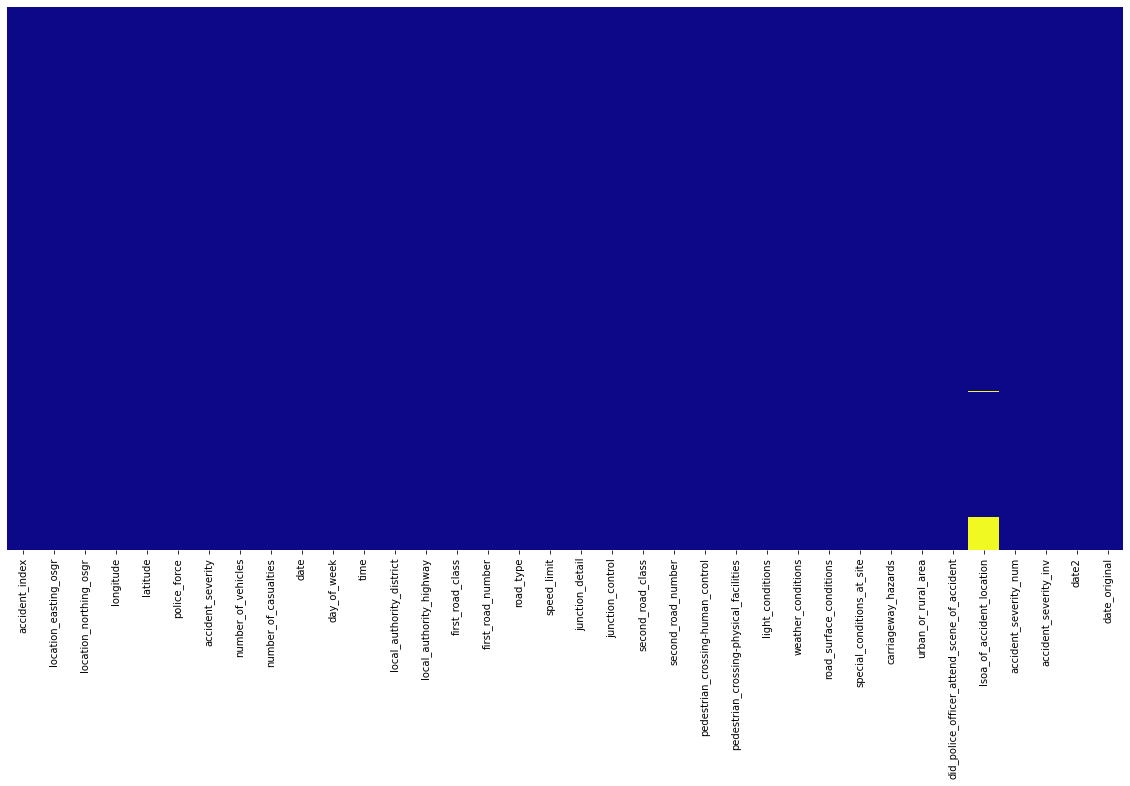

In [100]:
plt.figure(figsize = (20,10))
sns.heatmap(df_accidents_2015.isnull(), yticklabels=False, cbar=False, cmap='plasma');

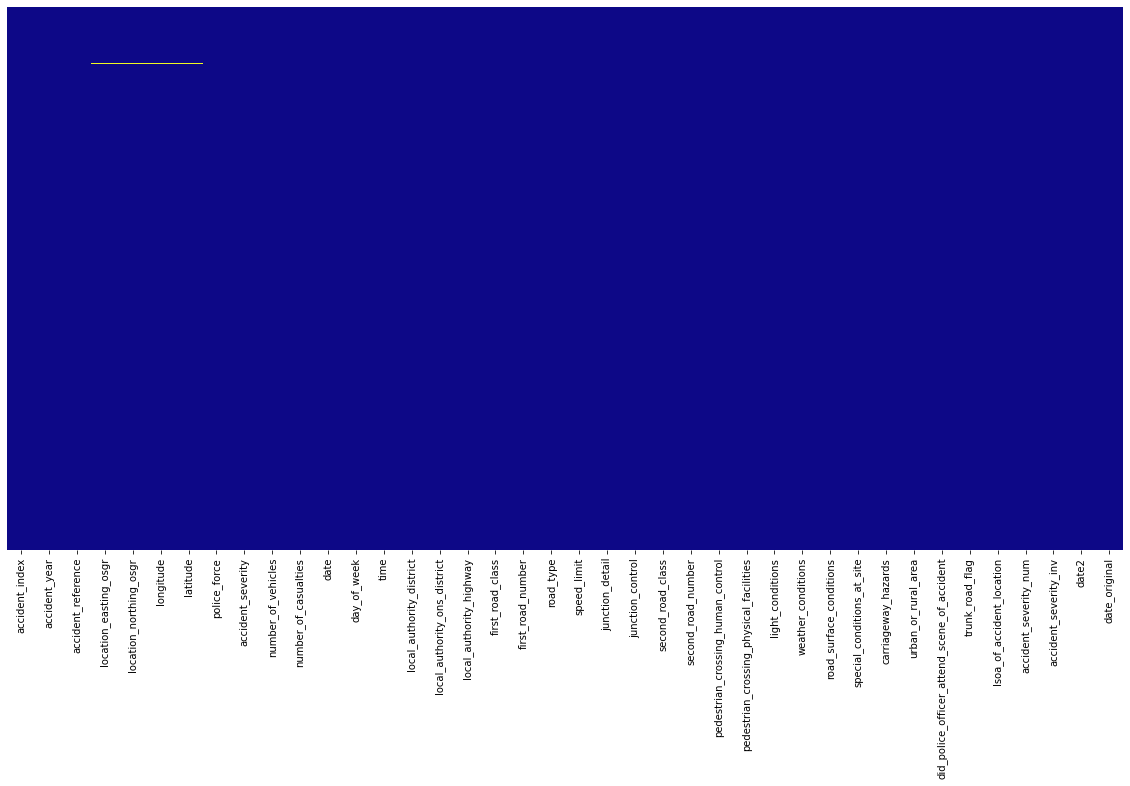

In [101]:
plt.figure(figsize = (20,10))
sns.heatmap(df_accidents_5yr.isnull(), yticklabels=False, cbar=False, cmap='plasma');

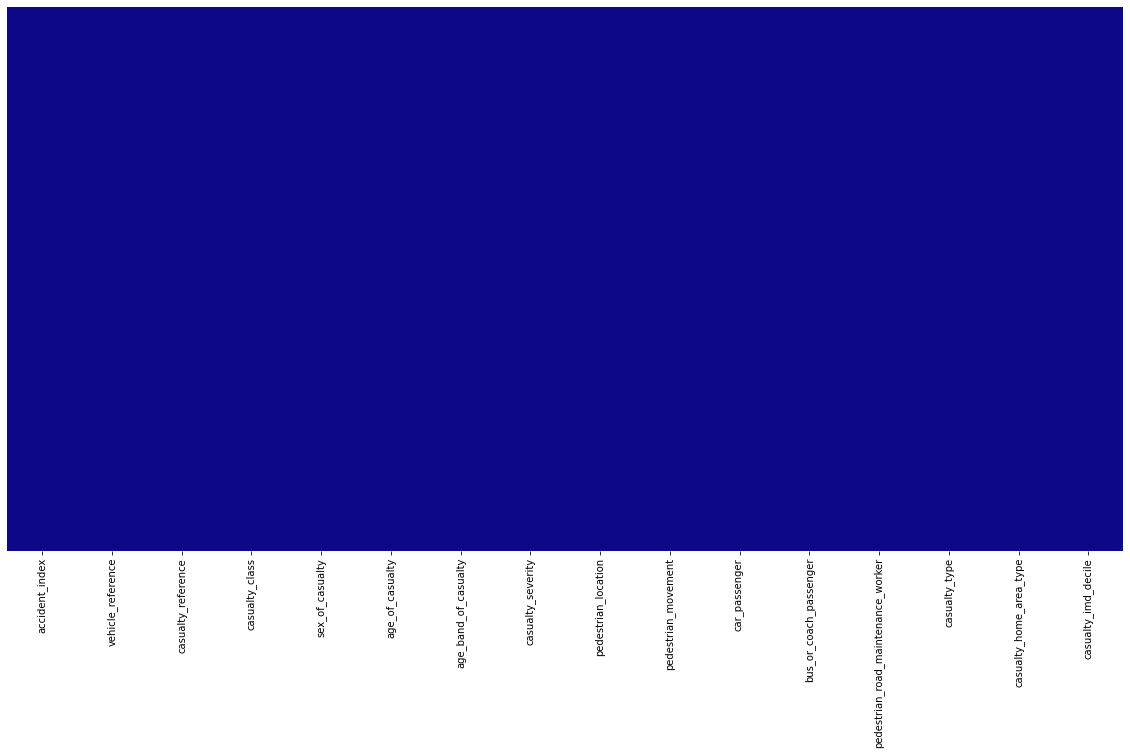

In [102]:
plt.figure(figsize = (20,10))
sns.heatmap(df_casualties_2015.isnull(), yticklabels=False, cbar=False, cmap='plasma');

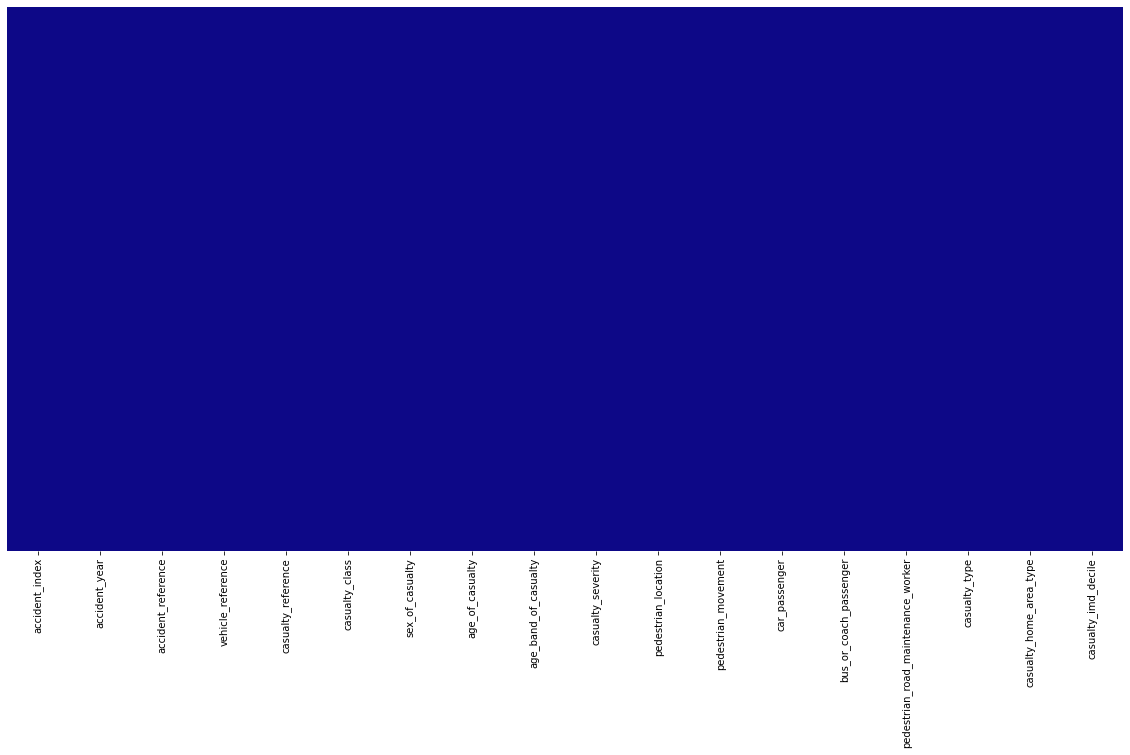

In [103]:
plt.figure(figsize = (20,10))
sns.heatmap(df_casualties_5yr.isnull(), yticklabels=False, cbar=False, cmap='plasma');

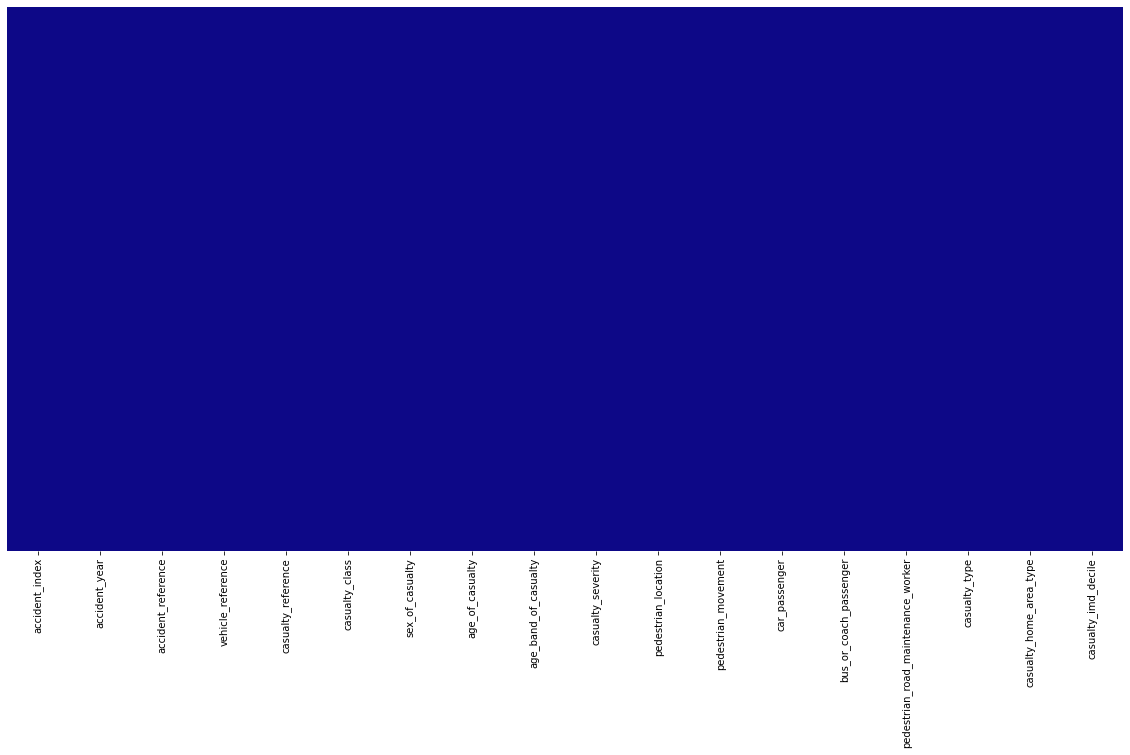

In [104]:
plt.figure(figsize = (20,10))
sns.heatmap(df_casualties_5yr.isnull(), yticklabels=False, cbar=False, cmap='plasma');

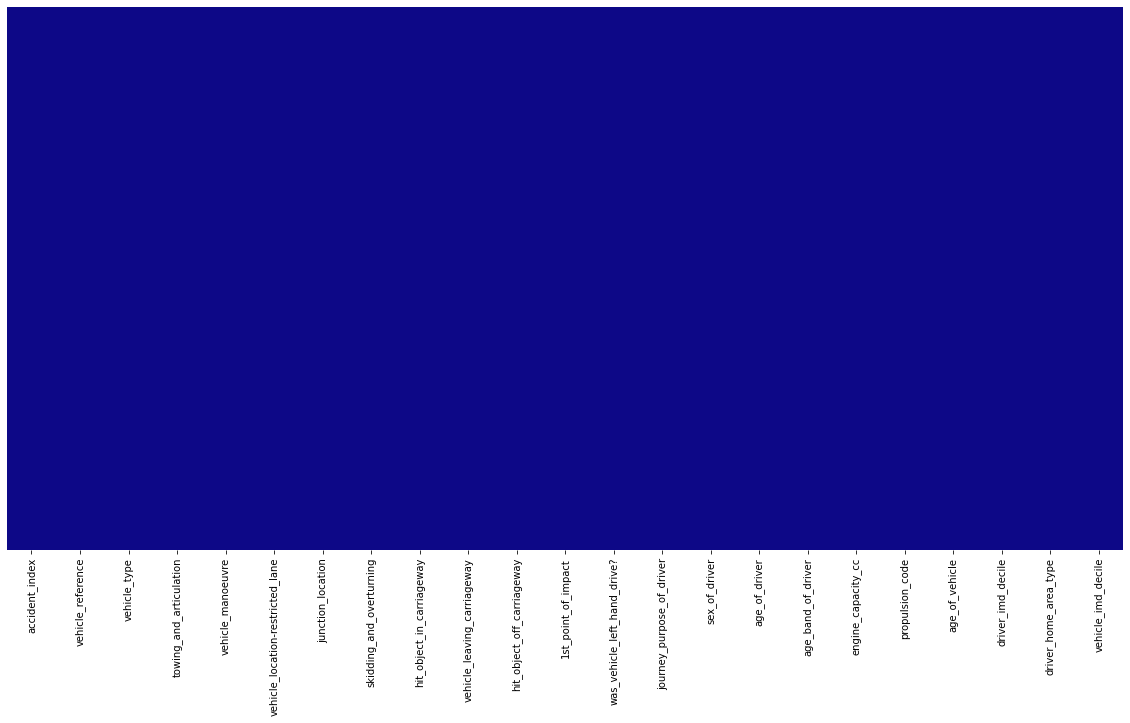

In [105]:
plt.figure(figsize = (20,10))
sns.heatmap(df_vehicles_2015.isnull(), yticklabels=False, cbar=False, cmap='plasma');

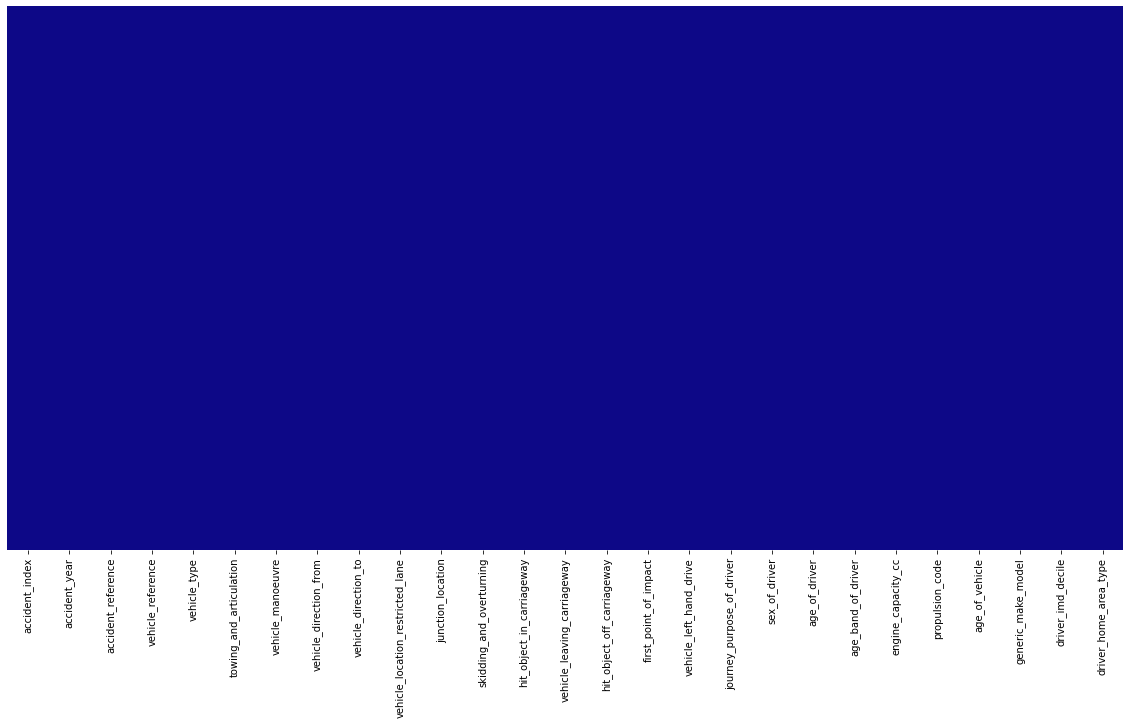

In [106]:
plt.figure(figsize = (20,10))
sns.heatmap(df_vehicles_5yr.isnull(), yticklabels=False, cbar=False, cmap='plasma');

Text(0, 0.5, 'Accident severity')

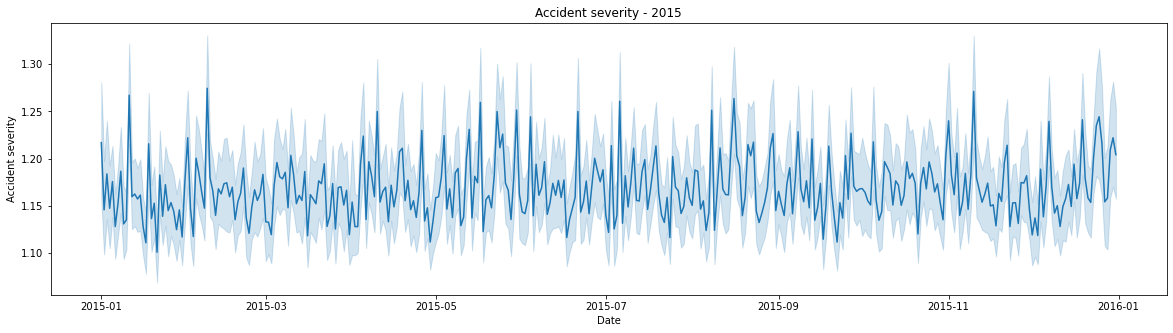

In [37]:
plt.figure(figsize=(20, 5))
time_series = sns.lineplot(x=df_accidents_2015['date'], y='accident_severity_inv', data=df_accidents_2015)
                          #hue='customer')
time_series.set_title("Accident severity - 2015")
time_series.set_xlabel("Date")
time_series.set_ylabel("Accident severity")

Text(0, 0.5, 'Number of casualties')

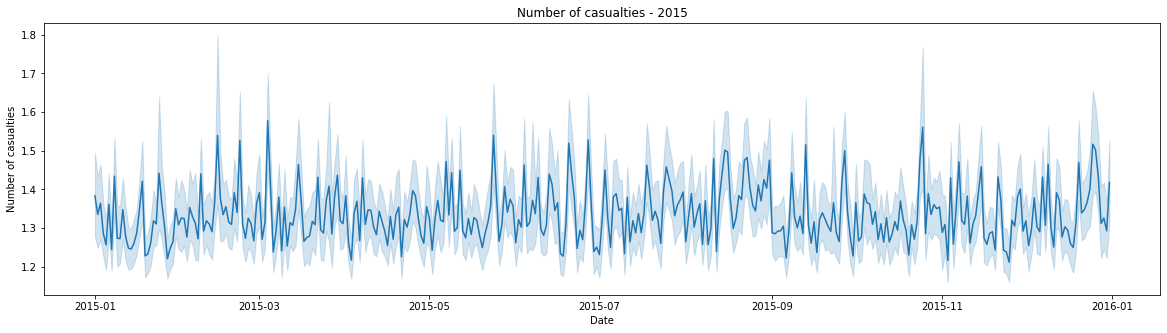

In [38]:
plt.figure(figsize=(20, 5))
time_series = sns.lineplot(x=df_accidents_2015['date'], y='number_of_casualties', data=df_accidents_2015)
                          #hue='customer')
time_series.set_title("Number of casualties - 2015")
time_series.set_xlabel("Date")
time_series.set_ylabel("Number of casualties")

Text(0, 0.5, 'Accident severity')

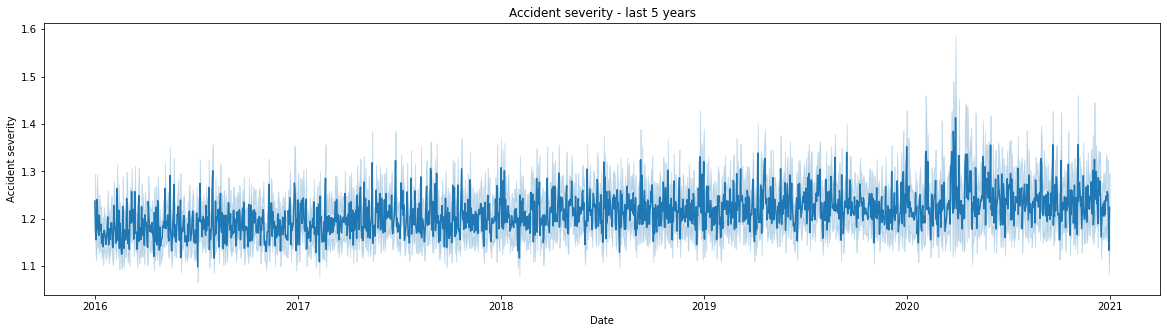

In [39]:
plt.figure(figsize=(20, 5))
time_series = sns.lineplot(x=df_accidents_5yr['date'], y='accident_severity_inv', data=df_accidents_5yr)
                          #hue='customer')
time_series.set_title("Accident severity - last 5 years")
time_series.set_xlabel("Date")
time_series.set_ylabel("Accident severity")

Text(0, 0.5, 'Number of casualties')

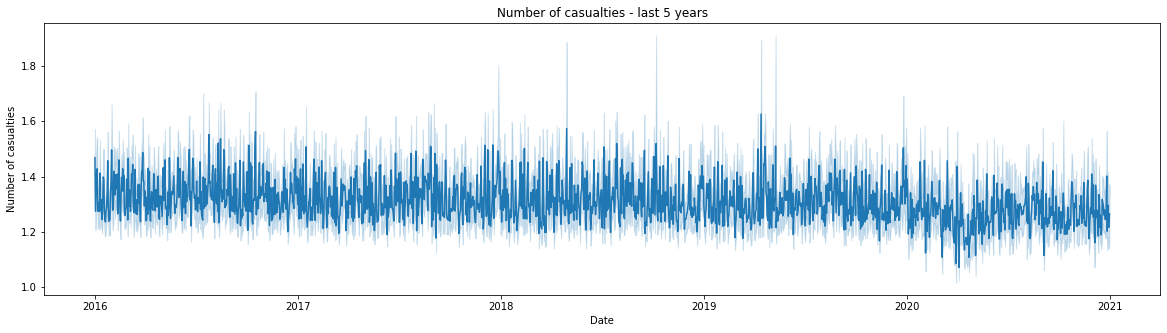

In [40]:
plt.figure(figsize=(20, 5))
time_series = sns.lineplot(x=df_accidents_5yr['date'], y='number_of_casualties', data=df_accidents_5yr)
                          #hue='customer')
time_series.set_title("Number of casualties - last 5 years")
time_series.set_xlabel("Date")
time_series.set_ylabel("Number of casualties")

In [41]:
print('Sum of Severity of Accidents in 2015 (for control):', df_accidents_2015['accident_severity_inv'].sum()) 
print('Sum of Severity of Accidents in 5 yrs (for control):', df_accidents_5yr['accident_severity_inv'].sum())


Sum of Severity of Accidents in 2015 (for control): 163326
Sum of Severity of Accidents in 5 yrs (for control): 722292


### Merge datasets

#### 2015

In [42]:
print(df_accidents_2015.shape)
print(df_vehicles_2015.shape)
print(df_casualties_2015.shape)

(140056, 36)
(257845, 23)
(186189, 16)


In [43]:
# Drop duplicates to merge dataframes
df_accidents_2015.drop_duplicates(subset='accident_index', inplace=True)
df_vehicles_2015.drop_duplicates(subset='accident_index', inplace=True)
df_casualties_2015.drop_duplicates(subset='accident_index', inplace=True)

In [44]:
df_2015 = pd.merge(df_accidents_2015, df_vehicles_2015, how='inner',left_on='accident_index', right_on='accident_index')

In [45]:
df_2015 = pd.merge(df_2015, df_casualties_2015, how='inner',left_on='accident_index', right_on='accident_index')

In [46]:
df_2015.shape # Includes accidents, cassualties, vehicles

(123672, 73)

In [47]:
df_2015['accident_severity_inv'].sum()

143877

In [48]:
df_accidents_2015['accident_severity_inv'].sum()

163326

#### 2016 - 2020

In [49]:
print(df_accidents_5yr.shape)
print(df_vehicles_5yr.shape)
print(df_casualties_5yr.shape)

(597973, 40)
(1101591, 27)
(781716, 18)


In [50]:
# Drop duplicates to merge dataframes
df_accidents_5yr.drop_duplicates(subset='accident_index', inplace=True)
df_vehicles_5yr.drop_duplicates(subset='accident_index', inplace=True)
df_casualties_5yr.drop_duplicates(subset='accident_index', inplace=True)

In [51]:
df_5yr = pd.merge(df_accidents_5yr, df_vehicles_5yr, how='inner',left_on='accident_index', right_on='accident_index' )#on='accident_index')

In [52]:
df_5yr = pd.merge(df_5yr, df_casualties_5yr, how='inner',left_on='accident_index', right_on='accident_index' )#on='accident_index')

In [53]:
df_accidents_5yr['accident_severity_inv'].sum() 

722292

In [54]:
df_5yr['accident_severity_inv'].sum() # Includes accidents, cassualties, vehicles

582785

In [55]:
print(df_2015.shape)
print(df_5yr.shape)
print(df_2015.shape[0]+df_5yr.shape[0])

(123672, 73)
(479794, 83)
603466


#### Put together data from all years

In [56]:
df_accidents = pd.concat([df_accidents_2015, df_accidents_5yr], axis=0, ignore_index=True)

In [57]:
df_vehicles = pd.concat([df_vehicles_2015, df_vehicles_5yr], axis=0, ignore_index=True)

In [58]:
df_casualties = pd.concat([df_casualties_2015, df_casualties_5yr], axis=0, ignore_index=True)

In [59]:
df_accidents.to_csv('df_accidents.csv')
df_vehicles.to_csv('df_vehicles.csv')
df_casualties.to_csv('df_casualties.csv')

In [60]:
print(df_accidents.shape)
print(df_vehicles.shape)
print(df_casualties.shape)

(738029, 42)
(738031, 31)
(738029, 18)


In [61]:
df = pd.concat([df_2015, df_5yr], axis=0, ignore_index=True)

In [62]:
print(df.shape)

(603466, 89)


In [63]:
df.head()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,accident_year_y,accident_reference_y,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_point_of_impact,vehicle_left_hand_drive,generic_make_model,accident_year,accident_reference
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,Slight,1,1,2015-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,Slight,1,1,2015-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,Slight,1,1,2015-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,Slight,1,1,2015-01-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,Serious,2,1,2015-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.tail()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,accident_year_y,accident_reference_y,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_point_of_impact,vehicle_left_hand_drive,generic_make_model,accident_year,accident_reference
603461,2020991027064,343034.0,731654.0,-2.926320,56.473539,99,Serious,2,1,2020-12-08,...,2020.0,991027064,3.0,7.0,0.0,1.0,1.0,-1,2020.0,991027064
603462,2020991029573,257963.0,658891.0,-4.267565,55.802353,99,Slight,1,1,2020-11-13,...,2020.0,991029573,5.0,1.0,5.0,2.0,1.0,NISSAN QASHQAI,2020.0,991029573
603463,2020991030297,383664.0,810646.0,-2.271903,57.186317,99,Serious,2,1,2020-04-15,...,2020.0,991030297,8.0,2.0,0.0,3.0,1.0,AUDI A5,2020.0,991030297
603464,2020991030900,277161.0,674852.0,-3.968753,55.950940,99,Slight,2,1,2020-12-15,...,2020.0,991030900,8.0,2.0,0.0,3.0,1.0,BMW X3,2020.0,991030900
603465,2020991032575,240402.0,681950.0,-4.561040,56.003843,99,Slight,1,1,2020-08-25,...,2020.0,991032575,8.0,4.0,0.0,2.0,1.0,FORD FOCUS,2020.0,991032575


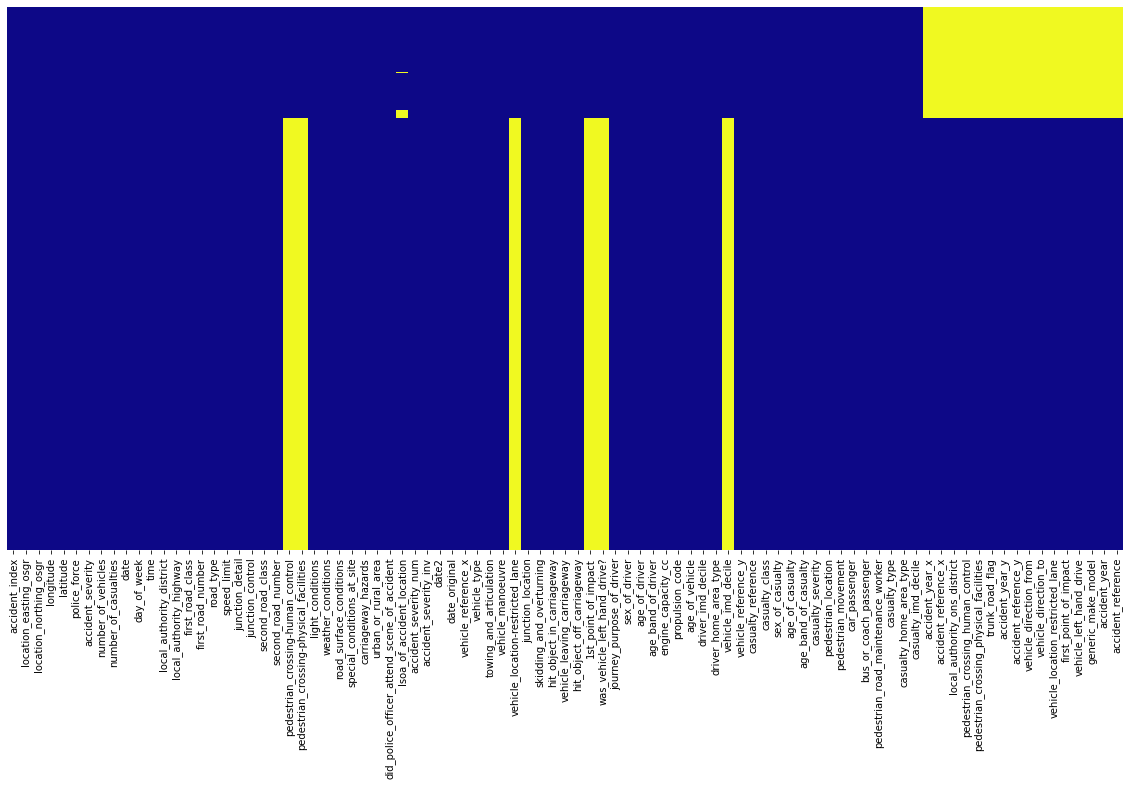

In [65]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma');

In [ ]:
df.to_csv('df_all.csv')

Text(0, 0.5, 'Accident severity')

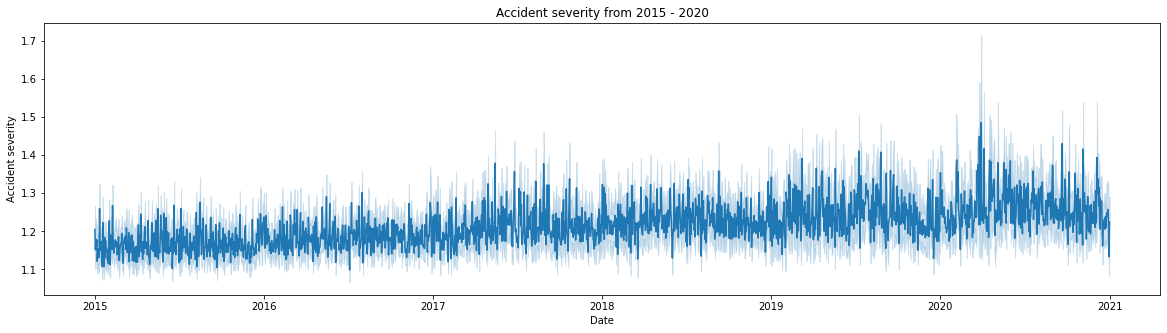

In [66]:
plt.figure(figsize=(20, 5))
time_series = sns.lineplot(x=df['date'], y='accident_severity_inv', data=df)
                          #hue='customer')
time_series.set_title("Accident severity from 2015 - 2020")
time_series.set_xlabel("Date")
time_series.set_ylabel("Accident severity")

Text(0, 0.5, 'Number of casualties')

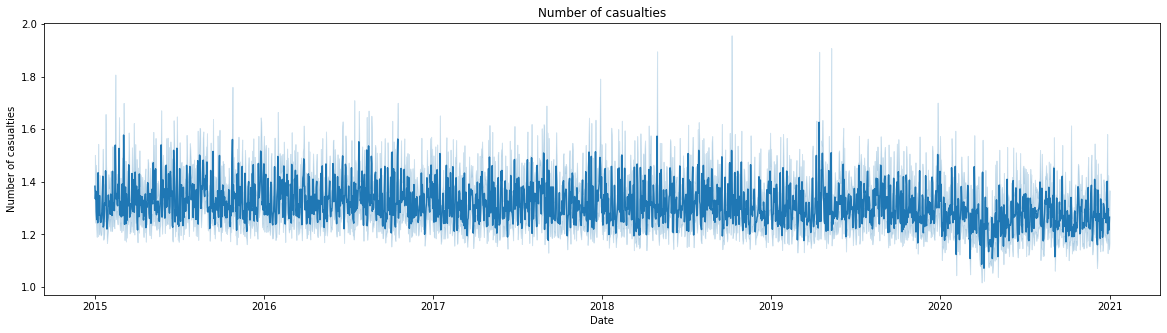

In [67]:
plt.figure(figsize=(20, 5))
time_series = sns.lineplot(x=df_accidents['date'], y='number_of_casualties', data=df_accidents)
                          #hue='customer')
time_series.set_title("Number of casualties")
time_series.set_xlabel("Date")
time_series.set_ylabel("Number of casualties")

### Create some columns 

#### Create column with accident_severity_inv * number_of_casualties

In [68]:
df[df['number_of_casualties']==0]

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,accident_year_y,accident_reference_y,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_point_of_impact,vehicle_left_hand_drive,generic_make_model,accident_year,accident_reference


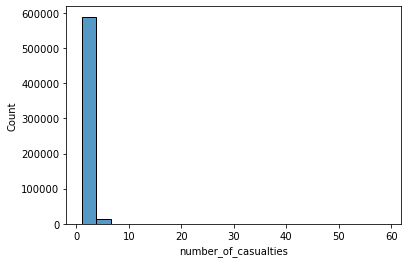

In [69]:
sns.histplot(df['number_of_casualties'], log_scale=False);

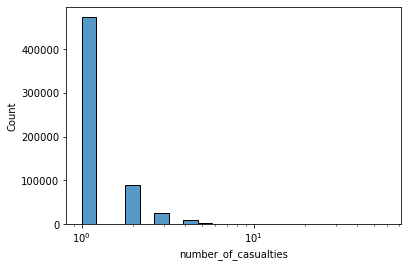

In [70]:
sns.histplot(df['number_of_casualties'], log_scale=True);

In [71]:
df['number_of_casualties'].value_counts()

1     473040
2      90149
3      25885
4       9104
5       3240
6       1216
7        406
8        181
9         81
10        62
11        23
12        20
13        12
16         6
14         6
15         4
17         4
27         3
19         3
20         2
23         2
36         2
21         2
18         1
24         1
35         1
58         1
38         1
34         1
26         1
33         1
42         1
59         1
29         1
25         1
41         1
Name: number_of_casualties, dtype: int64

In [72]:
df['severity'] = df['accident_severity_inv']*df['number_of_casualties']

In [73]:
df['severity'].value_counts()

1      386700
2      153789
3       25056
4       21884
6        7943
8        2506
5        2141
10        958
9         816
12        772
7         242
15        178
14        134
18        101
16         73
21         36
24         25
20         22
11         14
27         11
26          8
30          7
22          7
13          5
36          4
32          4
42          3
17          3
57          2
33          2
60          2
54          2
66          1
25          1
58          1
34          1
23          1
118         1
108         1
68          1
70          1
116         1
46          1
76          1
19          1
72          1
48          1
82          1
Name: severity, dtype: int64

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


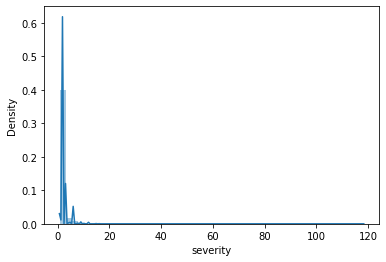

In [74]:
sns.distplot(df['severity']);

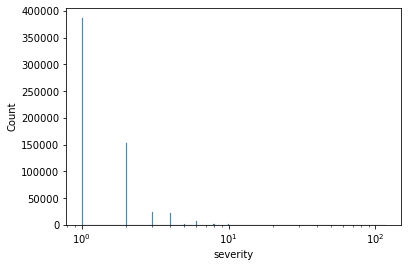

In [75]:
sns.histplot(df['severity'], log_scale=True);

### Create columns for year, month, and day of the week

In [76]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

### Exploratory data analysis

In [77]:
def pivot_table_perc(df, column1, column2, agg):
    pt = df.pivot_table(column1, index=column2, aggfunc='sum').sort_values(by=column1, ascending=False)/df[column1].sum()*100
    return pt

In [78]:
pivot_table_perc(df, 'accident_severity_inv', 'day_of_week', 'sum')

,accident_severity_inv
day_of_week,
Friday,15.538448
Thursday,14.948215
Wednesday,14.671470
Tuesday,14.502203
Monday,14.233715
Saturday,13.563390
Sunday,12.542558


In [79]:
pivot_table_perc(df, 'accident_severity_inv', 'local_authority_district', 'sum')

,accident_severity_inv
local_authority_district,
300,2.482585
204,1.577350
215,1.042988
926,0.956979
200,0.954364
...,...
609,0.042110
941,0.024083
936,0.020505


## Select only relevant data

- Select accidents where only cars and motorcycles were involved
- Select young drivers filtering by age band driver
- Select only non-rural zones - specifically London areas
- Select only accidents that took place over the night

In [80]:
# 2	Motorcycle 50cc and under
# 3	Motorcycle 125cc and under
# 4	Motorcycle over 125cc and up to 500cc
# 5	Motorcycle over 500cc
# 8	Taxi/Private hire car
# 9	Car
# 10	Minibus (8 - 16 passenger seats)
# 11	Bus or coach (17 or more pass seats)
# 16	Ridden horse
# 17	Agricultural vehicle
# 18	Tram
# 19	Van / Goods 3.5 tonnes mgw or under
# 20	Goods over 3.5t. and under 7.5t
# 21	Goods 7.5 tonnes mgw and over
# 22	Mobility scooter
# 23	Electric motorcycle
# 90	Other vehicle
# 97	Motorcycle - unknown cc


In [81]:
# Copy df to df2 to keep original format before selecting relevant data
df2 = df

# Select accidents where only cars and motorcycles were involved
df2 = df2[df2['vehicle_type'].isin([2,3,4,5,8,9,90,97])]

# Select young drivers filtering by age band driver
df2 = df2[df2['age_band_of_driver'] < 7]
df2 = df2[df2['age_band_of_driver'] != -1]

# Select only non-rural zones - specifically London areas
df2 = df2[df2['urban_or_rural_area'] != 2]

# Select only accidents that took place over the night
df2 = df2[(df2['time']>='18:00') | (df2['time']<='06:00')]

## London / Greater London Area (including London Orbital Motorway, M25)

#### Select only London areas 

In [82]:
# code	label
# 1	Westminster
# 2	Camden
# 3	Islington
# 4	Hackney
# 5	Tower Hamlets
# 6	Greenwich
# 7	Lewisham
# 8	Southwark
# 9	Lambeth
# 10	Wandsworth
# 11	Hammersmith and Fulham
# 12	Kensington and Chelsea
# 13	Waltham Forest
# 14	Redbridge
# 15	Havering
# 16	Barking and Dagenham
# 17	Newham
# 18	Bexley
# 19	Bromley
# 20	Croydon
# 21	Sutton
# 22	Merton
# 23	Kingston upon Thames
# 24	Richmond upon Thames
# 25	Hounslow
# 26	Hillingdon
# 27	Ealing
# 28	Brent
# 29	Harrow
# 30	Barnet
# 31	Haringey
# 32	Enfield

# 33	Hertsmere
# 38	Epsom and Ewell
# 40	Spelthorne
# 57	London Airport (Heathrow)
# 452	Brentwood
# 532	Dartford

# 435	Stevenage


In [83]:
london_areas = np.append(np.arange(1,32), [33,38, 40,57,452,532,435])
london_areas

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  33,  38,  40,  57, 452, 532, 435])

In [84]:
# Select London areas
df3 = df2[df2['local_authority_district'].isin(london_areas)]

In [85]:
# Recode districts
df3['local_authority_district'] = df3['local_authority_district'].map(codes_district)

C:\Users\franc\AppData\Local\Temp/ipykernel_20404/3455977600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['local_authority_district'] = df3['local_authority_district'].map(codes_district)


In [86]:
df3.shape

(10347, 92)

In [87]:
pivot_table_perc(df3, 'accident_severity_inv', 'local_authority_district', 'sum')

,accident_severity_inv
local_authority_district,
Westminster,5.569424
Tower Hamlets,5.225101
Lambeth,4.837738
Ealing,4.553671
Brent,4.252389
Newham,4.200740
Croydon,4.037187
Barnet,3.890850
Wandsworth,3.856417


In [88]:
pivot_table_perc(df3, 'accident_severity_inv', 'day_of_week', 'sum')

,accident_severity_inv
day_of_week,
Friday,15.873289
Saturday,15.856073
Sunday,15.313764
Thursday,14.048377
Wednesday,13.747095
Tuesday,12.765774
Monday,12.395627


In [89]:
# Select only weekends
df_weekend = df3[df3['day_of_week'].isin(['Friday', 'Saturday', 'Sunday','Monday'])]

In [90]:
pivot_table_perc(df_weekend, 'accident_severity_inv', 'local_authority_district', 'sum')

,accident_severity_inv
local_authority_district,
Westminster,5.836350
Tower Hamlets,5.488776
Lambeth,4.706734
Ealing,4.402607
Newham,4.286749
Brent,4.098479
Wandsworth,4.069515
Croydon,4.040550
Southwark,3.765387


In [91]:
pivot_table_perc(df_weekend, 'number_of_casualties', 'local_authority_district', 'sum')

,number_of_casualties
local_authority_district,
Tower Hamlets,5.752708
Westminster,5.428963
Newham,4.669406
Lambeth,4.544889
Ealing,4.457726
Brent,4.009463
Haringey,3.947205
Barnet,3.847591
Croydon,3.698170


In [92]:
pivot_table_perc(df3, 'accident_severity_inv', 'month', 'sum')

,accident_severity_inv
month,
12,13.600758
11,12.034088
1,10.983903
10,8.883533
2,7.988293
3,7.420160
6,6.740122
7,6.714298
9,6.636825


In [93]:
pivot_table_perc(df3, 'number_of_casualties', 'month', 'sum')

,number_of_casualties
month,
12,13.372701
11,11.735685
1,10.741516
10,8.992376
2,7.886082
3,7.415159
6,6.914337
7,6.869487
5,6.652713


In [94]:
pivot_table_perc(df3, 'accident_severity_inv', 'age_band_of_driver', 'sum')
# 1	0 - 5
# 2	6 - 10
# 3	11 - 15
# 4	16 - 20 ***
# 5	21 - 25 ***
# 6	26 - 35 ***
# 7	36 - 45

,accident_severity_inv
age_band_of_driver,
6,53.946802
5,30.877163
4,15.055522
3,0.120513


In [95]:
pivot_table_perc(df3, 'number_of_casualties', 'age_band_of_driver', 'sum')
# 1	0 - 5
# 2	6 - 10
# 3	11 - 15
# 4	16 - 20 ***
# 5	21 - 25 ***
# 6	26 - 35 ***
# 7	36 - 45

,number_of_casualties
age_band_of_driver,
6,53.543131
5,31.133204
4,15.241441
3,0.082225


In [96]:
pivot_table_perc(df3, 'severity', 'month', 'sum')

,severity
month,
12,13.520493
11,11.812223
1,11.037542
10,8.832682
2,7.985169
3,7.488578
7,6.965504
6,6.839701
9,6.660928


In [97]:
pivot_table_perc(df3, 'accident_severity_inv', 'day_of_week', 'sum')

,accident_severity_inv
day_of_week,
Friday,15.873289
Saturday,15.856073
Sunday,15.313764
Thursday,14.048377
Wednesday,13.747095
Tuesday,12.765774
Monday,12.395627


In [98]:
pivot_table_perc(df3, 'number_of_casualties', 'day_of_week', 'sum')

,number_of_casualties
day_of_week,
Saturday,16.407535
Friday,15.734788
Sunday,15.405890
Thursday,13.873524
Wednesday,13.335327
Tuesday,12.759755
Monday,12.483181


In [99]:
pivot_table_perc(df3, 'severity', 'day_of_week', 'sum')

,severity
day_of_week,
Saturday,16.314639
Friday,15.871019
Sunday,15.546580
Thursday,13.752235
Wednesday,13.553599
Tuesday,12.500828
Monday,12.461100


In [100]:
df3.pivot_table('accident_severity_inv', index='month', columns='year', aggfunc='sum')

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,304,332,262,59,216,103
2,291,288,235,43,35,36
3,275,322,149,51,32,33
4,289,269,60,47,23,27
5,308,295,47,48,32,25
6,307,305,54,43,22,52
7,307,303,41,54,30,45
8,284,277,55,53,38,30
9,255,297,46,100,34,39


In [101]:
pd.DataFrame(df3.groupby(['local_authority_district'], sort=False))

df3.groupby(['local_authority_district'])['accident_severity_inv'].sum()

# df3.groupby('local_authority_district').agg({'accident_severity_inv': ['sum']})

local_authority_district
Barking and Dagenham         251
Barnet                       452
Bexley                       202
Brent                        494
Brentwood                     40
Bromley                      306
Camden                       343
Croydon                      469
Dartford                     106
Ealing                       529
Epsom and Ewell               65
Greenwich                    289
Hackney                      398
Hammersmith and Fulham       285
Haringey                     440
Harrow                       187
Havering                     231
Hertsmere                     80
Hillingdon                   285
Hounslow                     403
Islington                    368
Kensington and Chelsea       286
Kingston upon Thames         121
Lambeth                      562
Lewisham                     370
London Airport (Heathrow)      9
Merton                       205
Newham                       488
Redbridge                    365
Richmond upon Tham

In [102]:
df3.groupby(['local_authority_district','year'])['accident_severity_inv'].sum().reset_index()


,local_authority_district,year,accident_severity_inv
0,Barking and Dagenham,2015,66
1,Barking and Dagenham,2016,91
2,Barking and Dagenham,2017,39
3,Barking and Dagenham,2018,24
4,Barking and Dagenham,2019,18
...,...,...,...
210,Westminster,2016,199
211,Westminster,2017,97
212,Westminster,2018,76
213,Westminster,2019,55


In [103]:
df3.pivot_table('number_of_casualties', index='month', columns='year', aggfunc='sum')

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,322,390,292,70,247,116
2,332,351,242,50,40,40
3,316,396,158,50,38,34
4,336,329,76,50,32,30
5,362,353,58,51,36,30
6,358,376,61,48,22,60
7,365,352,46,57,38,61
8,337,328,61,60,42,28
9,301,336,56,116,38,42


In [104]:
df3.pivot_table('severity', index='month', columns='year', aggfunc='sum')

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,365,439,345,87,299,132
2,371,395,282,57,56,45
3,340,457,183,60,46,45
4,365,354,89,55,34,33
5,395,379,65,57,44,31
6,380,429,72,53,23,76
7,409,397,52,78,44,72
8,367,355,71,71,51,32
9,324,394,60,133,48,47


In [105]:
df3.pivot_table('severity', index='day_of_week', columns='year', aggfunc='sum')

year,2015,2016,2017,2018,2019,2020
day_of_week,,,,,,
Friday,667,833,256,262,245,134
Monday,581,606,192,200,185,118
Saturday,728,803,298,239,189,207
Sunday,743,755,251,307,161,131
Thursday,632,662,252,232,158,141
Tuesday,585,608,251,164,155,125
Wednesday,570,683,223,208,179,184


In [106]:
np.round(100*df3.pivot_table('severity', index='day_of_week', columns='year', aggfunc='sum')/df3.pivot_table('severity', index='day_of_week', columns='year', aggfunc='sum').sum(),2)

year,2015,2016,2017,2018,2019,2020
day_of_week,,,,,,
Friday,14.80,16.83,14.86,16.25,19.26,12.88
Monday,12.89,12.24,11.14,12.41,14.54,11.35
Saturday,16.16,16.22,17.30,14.83,14.86,19.90
Sunday,16.49,15.25,14.57,19.04,12.66,12.60
Thursday,14.03,13.37,14.63,14.39,12.42,13.56
Tuesday,12.98,12.28,14.57,10.17,12.19,12.02
Wednesday,12.65,13.80,12.94,12.90,14.07,17.69


In [107]:
np.round(100*df3.pivot_table('severity', index='month', columns='year', aggfunc='sum')/df3.pivot_table('severity', index='month', columns='year', aggfunc='sum').sum())


year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,8.0,9.0,20.0,5.0,24.0,13.0
2,8.0,8.0,16.0,4.0,4.0,4.0
3,8.0,9.0,11.0,4.0,4.0,4.0
4,8.0,7.0,5.0,3.0,3.0,3.0
5,9.0,8.0,4.0,4.0,3.0,3.0
6,8.0,9.0,4.0,3.0,2.0,7.0
7,9.0,8.0,3.0,5.0,3.0,7.0
8,8.0,7.0,4.0,4.0,4.0,3.0
9,7.0,8.0,3.0,8.0,4.0,5.0


<AxesSubplot:>

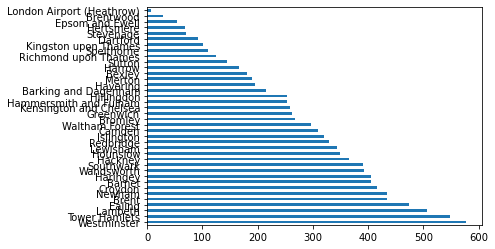

In [108]:
districts_by_accident = df3.local_authority_district.value_counts()
districts_by_accident.plot(kind='barh')

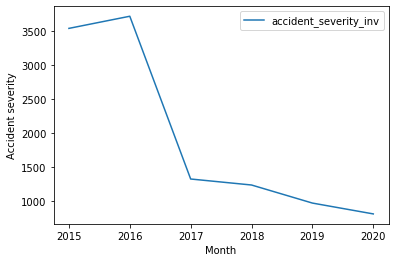

In [109]:
df3.pivot_table('accident_severity_inv', index='year', aggfunc='sum').plot()
plt.xlabel('Month');
plt.ylabel('Accident severity');

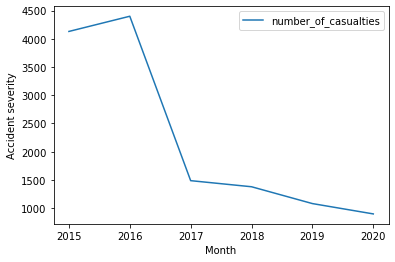

In [110]:
df3.pivot_table('number_of_casualties', index='year', aggfunc='sum').plot()
plt.xlabel('Month');
plt.ylabel('Accident severity');

In [111]:
df3.pivot_table('number_of_casualties', index='year', aggfunc='sum')

,number_of_casualties
year,
2015,4130
2016,4399
2017,1488
2018,1380
2019,1082
2020,899


In [112]:
df3.columns

Index(['accident_index', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location', 'accident_severity_num',
       'accident_severity_inv', 'date2', 'date_original',
       'vehicle_reference_x', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_location

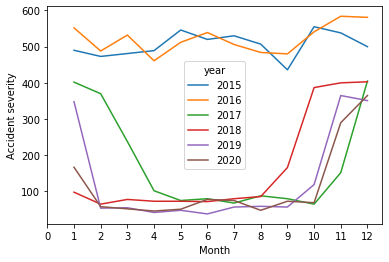

In [113]:
df3.pivot_table('number_of_vehicles', index='month', columns='year', aggfunc='sum').plot()
plt.xticks(np.arange(13))
plt.xlabel('Month');
plt.ylabel('Accident severity');

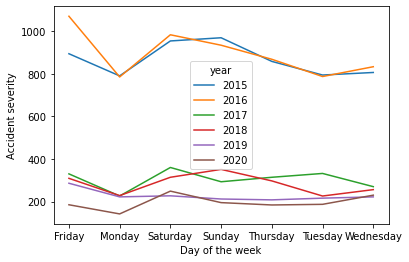

In [114]:
df3.pivot_table('number_of_vehicles', index='day_of_week', columns='year', aggfunc='sum').plot()
plt.xlabel('Day of the week');
plt.ylabel('Accident severity');

In [115]:
df3.pivot_table('severity', index='year', aggfunc='sum')

,severity
year,
2015,4506
2016,4950
2017,1723
2018,1612
2019,1272
2020,1040


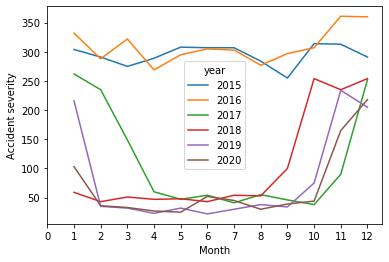

In [116]:
df3.pivot_table('accident_severity_inv', index='month', columns='year', aggfunc='sum').plot()
plt.xticks(np.arange(13))
plt.xlabel('Month');
plt.ylabel('Accident severity');

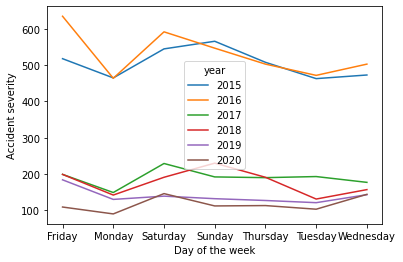

In [117]:
df3.pivot_table('accident_severity_inv', index='day_of_week', columns='year', aggfunc='sum').plot()
plt.xlabel('Day of the week');
plt.ylabel('Accident severity');

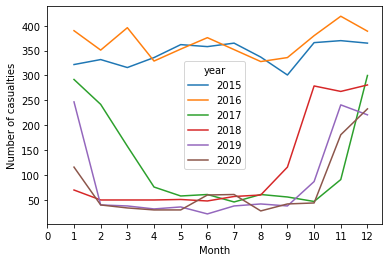

In [118]:
df3.pivot_table('number_of_casualties', index='month', columns='year', aggfunc='sum').plot()
plt.xticks(np.arange(13))
plt.xlabel('Month');
plt.ylabel('Number of casualties');

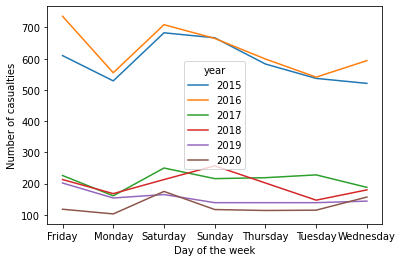

In [119]:
df3.pivot_table('number_of_casualties', index='day_of_week', columns='year', aggfunc='sum').plot()
plt.xlabel('Day of the week');
plt.ylabel('Number of casualties');

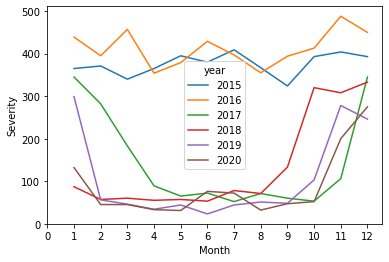

In [120]:
df3.pivot_table('severity', index='month', columns='year', aggfunc='sum').plot()
plt.xticks(np.arange(13))
plt.xlabel('Month');
plt.ylabel('Severity');

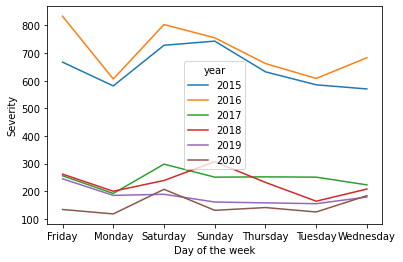

In [121]:
df3.pivot_table('severity', index='day_of_week', columns='year', aggfunc='sum').plot()
plt.xlabel('Day of the week');
plt.ylabel('Severity');

Text(0, 0.5, 'Accident severity')

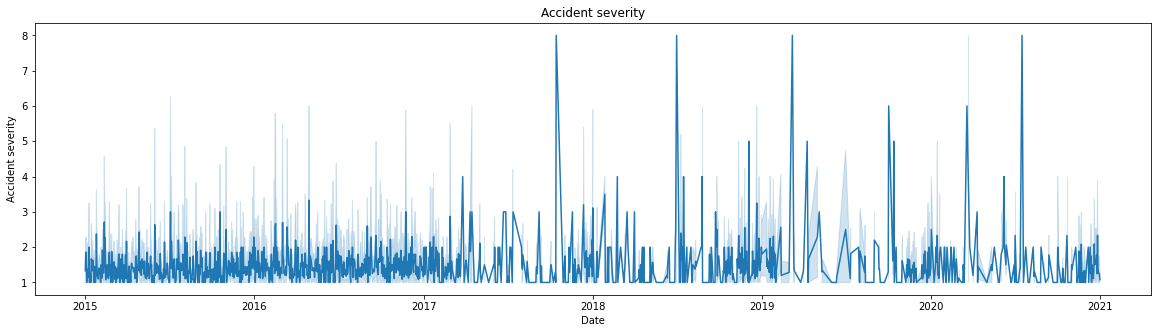

In [329]:
plt.figure(figsize=(20, 5))
time_series = sns.lineplot(x=df3['date'], y='severity', data=df3)
                          #hue='customer')
time_series.set_title("Accident severity")
time_series.set_xlabel("Date")
time_series.set_ylabel("Accident severity")

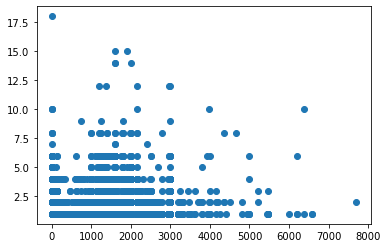

In [122]:
plt.scatter(df3['engine_capacity_cc'], df3['severity'])

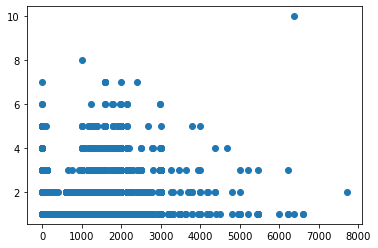

In [123]:
plt.scatter(df3['engine_capacity_cc'], df3['number_of_casualties'])

In [124]:
# Create column with hour
df3['hours'] = pd.DatetimeIndex(df3['time']).hour

C:\Users\franc\AppData\Local\Temp/ipykernel_20404/2855093887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['hours'] = pd.DatetimeIndex(df3['time']).hour


In [125]:
df3['hours']

2         18
10        22
12        18
17         1
24         1
          ..
585355    20
585365    22
585495    22
585816    21
585948     2
Name: hours, Length: 10347, dtype: int64

In [126]:
# Recode age band of driver and sex of driver
df3['age_band_of_driver'] = df3['age_band_of_driver'].map(codes_age_band)
df3['sex_of_driver'] = df3['sex_of_driver'].map(codes_sex)

C:\Users\franc\AppData\Local\Temp/ipykernel_20404/2159687948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age_band_of_driver'] = df3['age_band_of_driver'].map(codes_age_band)
C:\Users\franc\AppData\Local\Temp/ipykernel_20404/2159687948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sex_of_driver'] = df3['sex_of_driver'].map(codes_sex)


In [127]:
# Save df3 to csv
df3.to_csv('df_london.csv')

In [128]:
# Select relevant data from original data

df_all = df[df['local_authority_district'].isin(london_areas)]

df2_all = df_all[df_all['age_band_of_driver'] != -1]

df_all['age_band_of_driver'] = df_all['age_band_of_driver'].map(codes_age_band)
df_all['sex_of_driver'] = df_all['sex_of_driver'].map(codes_sex)
df_all['hours'] = pd.DatetimeIndex(df_all['time']).hour
df_all['local_authority_district'] = df_all['local_authority_district'].map(codes_district)

C:\Users\franc\AppData\Local\Temp/ipykernel_20404/609728620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['age_band_of_driver'] = df_all['age_band_of_driver'].map(codes_age_band)
C:\Users\franc\AppData\Local\Temp/ipykernel_20404/609728620.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['sex_of_driver'] = df_all['sex_of_driver'].map(codes_sex)
C:\Users\franc\AppData\Local\Temp/ipykernel_20404/609728620.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [129]:
df_all


,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,vehicle_location_restricted_lane,first_point_of_impact,vehicle_left_hand_drive,generic_make_model,accident_year,accident_reference,severity,year,month,hours
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,Slight,1,1,2015-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2015,12,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,Slight,1,1,2015-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2015,12,7
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,Slight,1,1,2015-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2015,12,18
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,Slight,1,1,2015-01-13,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2015,1,7
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,Serious,2,1,2015-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2015,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585952,2020461011490,555366.0,171459.0,0.233123,51.420855,46,Serious,2,1,2020-12-22,...,0.0,3.0,1.0,SAAB 9-3,2020.0,461011490,2,2020,12,17
585978,2020461012378,562252.0,172224.0,0.332423,51.425800,46,Slight,4,2,2020-12-14,...,0.0,3.0,2.0,-1,2020.0,461012378,2,2020,12,13
585980,2020461012413,560098.0,169031.0,0.300026,51.397725,46,Slight,2,1,2020-11-30,...,0.0,4.0,1.0,-1,2020.0,461012413,1,2020,11,9
585987,2020461012702,558582.0,174434.0,0.280667,51.446693,46,Slight,1,1,2020-10-19,...,0.0,4.0,1.0,FORD FOCUS,2020.0,461012702,1,2020,10,12


In [130]:
# Save all data to csv
df_all.to_csv('df_all_data_london.csv')